# [NML23] Assignment 1: Graph theory basics

TAs: [Ortal Senouf](https://people.epfl.ch/ortal.senouf) and [William Cappelletti](https://people.epfl.ch/william.cappelletti)

## Students

* Team: `<your team number>`
* Students: `Hugo Fluhr`, `Nino Hervé`

## Rules

> ⚠️ **Read carefully before starting**

**Deadline:** March 28th

**Grading:**
* The integrality of Assignment 1 will be scaled to 100% and will amount to 25% of the overall assignments score.
* The total number of points for part A is **50**, the points for each exercise are stated in the instructions.
* All team members will receive the same grade based on the team solution.
* Collaboration between team members is encouraged. No collaboration between teams is allowed.

**Expected output:**

You will have coding and theoretical questions.

Coding exercises shall be solved within the specified space:
```python
# Your solution here ###########################################################
...
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
```
You can create any additional variables or functions that you think necessary, but if a variable is explicitly stated, you shall use it for the corresponding values, as it will be re-used afterwards. Anything outside shall not be touched, except if otherwise stated. Failing to comply to instructions will be penalized.

Theoretical questions shall be answered in the following markdown cell. The first line will be 
> **Your answer here:**

**Submission:**
* Your submission is self-contained in the `.ipynb` file.

* Code has to be clean and readable. Provide meaningful variable names and comment where needed.

* Textual answers in [markdown cells][md_cells] shall be short: one to two
  sentences. Math shall be written in [LaTeX][md_latex].
    **NOTE**: handwritten notes pasted in the notebook are ignored

* You cannot import any other library than we imported.
  Note that Networkx is imported in the second section and cannot be used in the first except for the Question 4 of Section 1 (at the indicated portion only).

* Make sure all cells are executed before submitting. I.e., if you open the notebook again it should show numerical results and plots. Cells not run are ignored.

* Execute your notebook on **google colab** from a blank state before submission, to make sure it is reproducible. You can click "Kernel" then "Restart Kernel and Run All Cells" in Jupyter. We might re-run cells to ensure that the code is working and corresponds to the results.

[md_cells]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
[md_latex]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

## Objective

The purpose of this assignment is to explore a given dataset, representing it as a network and constructing different graphs. In the first section, you will analyze the network properties. In the second section, you will explore various network models and find out the network model fitting the ones you construct from the dataset.

## Cora Dataset

The [Cora dataset](https://linqs.soe.ucsc.edu/node/236) consists of scientific publications classified into one of seven research fields. 

* **Citation graph:** the citation network can be constructed from the connections given in the `cora.cites` file.
* **Feature graph:** each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary and its research field, given in the `cora.content` file. The dictionary consists of 1433 unique words. A feature graph can be constructed using the Euclidean distance between the feature vector of the publications.

The [`README`](data/cora/README) provides details about the content of [`cora.cites`](data/cora/cora.cites) and [`cora.content`](data/cora/cora.content).

Let us first download the cora dataset, it will be saved in the current working directory in the (new) `cora` folder

In [2]:
#!pip install networkx==3.0 -q

#_files = !ls cora
#if _files != ['README', 'cora.cites', 'cora.content']:
#    !wget https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz
#    !tar -xvf cora.tgz

## Part A: Network Properties

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

### Question 1 [16pt]: Construct a Citation Graph and a Feature Graph 

#### Part 1.1: Data loading and exploration


**1.1.1 [2pt]** Read the `cora.content` file into a Pandas DataFrame, indexed by the papers ID. Check the `README` file to identify the column names and
the data format. Then, print 5 random rows and print out the number of papers
contained in each of the reasearch fields.

*Hints:*
- Use the `read_csv` function to load data;
- Sort papers by id;
- Pandas DataFrames have a `value_counts()` method.

In [4]:
# Your solution here ###########################################################

# create columns names (id + 1433 words + label)
column_names = [f'W_{i}' for i in range(1433)]       # 1433 unique words
column_names = ['id'] + column_names + ['field']

# load data content into DataFrame
df = pd.read_csv("cora/cora.content", sep='\t', header=None, names=column_names)
df = df.set_index('id').sort_index()  # index and sort by paper ID
display(df.head(5))

# count number of papers in each category
print('\n\033[4mNumber of papers per field:\033[0m')
df['field'].value_counts()

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

FileNotFoundError: [Errno 2] No such file or directory: 'cora/cora.content'

**1.1.2 [1pt]** Select all papers from the field `Genetic_Algorithms` and store their feature vectors into a NumPy array.
Check its shape.

In [4]:
my_field = 'Genetic_Algorithms'
# Your solution here ###########################################################

features = df.loc[df['field']==my_field, df.dtypes=='int'].values

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print("{} nodes with {} features".format(*features.shape))

418 nodes with 1433 features


**1.1.3 [2pt]** Let $D$ be the Euclidean distance matrix whose $(i,j)$ entry corresponds to the Euclidean distance between feature vectors $i$ and $j$.
Using the feature vectors of the papers from the field which you have selected, construct $D$ as a Numpy array.

*Bonus 1pt* if you can do it without for loops

In [5]:
# Your solution here ###########################################################

D = np.linalg.norm(features[:,None,:]-features[None,:,:], axis=-1)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**1.1.4 [1pt]** Compute and print the mean pairwise distance $\mathbb{E}[D]$.

In [6]:
# Your solution here ###########################################################

triu_idx = np.triu_indices(D.shape[0], k=1)      # returns upper triangle indices with offset k to diagonal
mean_distance = np.mean(D[triu_idx])     
print(mean_distance)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

5.621618615887458


**1.1.5 [2pt]** Plot an histogram of the euclidean distances.

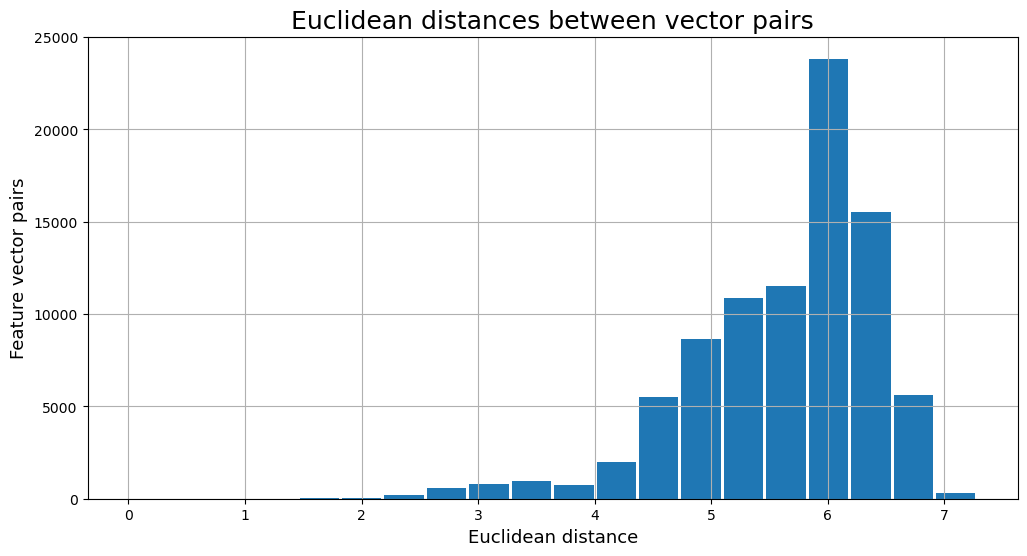

In [7]:
# Your solution here ###########################################################

plt.figure(figsize=(12,6))
plt.hist(D[triu_idx], bins=20, rwidth=0.93);                            # ';' avoids additional printings
plt.title('Euclidean distances between vector pairs', fontsize=18)
plt.xlabel('Euclidean distance', fontsize=13)
plt.ylabel('Feature vector pairs', fontsize=13)
plt.grid()

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

#### Part 1.2: Building graphs

**1.2.1 [2pt]** First, we will create an adjacency matrix for the papers by thresholding the Euclidean distance matrix.
The resulting (unweighted) adjacency matrix should have entries
$$ A_{ij} = \begin{cases} 1, \; \text{if} \; d(i,j)< \mathbb{E}[D], \; i \neq j, \\ 0, \; \text{otherwise.} \end{cases} $$

Build such adjacency matrix using the average distance as threshold

In [8]:
# Your solution here ###########################################################

A_feature = (D < mean_distance).astype(int)
np.fill_diagonal(A_feature, 0)                            # diagonal is distance 0 so smaller than mean_distance, but to keep graph simple delete self loops

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**1.2.2 [3pt]** Now read the `cora.cites` file and construct the citation graph by converting the given citation connections into an adjacency matrix `A_citation`.

*Hint:*
- The edges are between `paper_id`s. Not all integers correspond to IDs;
- Check the README for the connection description

In [9]:
cora_cites = np.genfromtxt('cora/cora.cites', delimiter='\t', dtype=int)
# get graph edges and flatten them for processing
print("Cites head:")
print(cora_cites[:5], end="\n\n")

# Your solution here ###########################################################

A_citation = np.zeros((df.shape[0], df.shape[0]))   # initialize empty adj matrix
id_lut = df.index.values                            # paper IDs look up table

for edge in cora_cites:
   A_citation[np.argwhere(id_lut==edge[1]), np.argwhere(id_lut==edge[0])] = 1

assert np.sum(A_citation) == cora_cites.shape[0]

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("Adj shape:", A_citation.shape)

Cites head:
[[     35    1033]
 [     35  103482]
 [     35  103515]
 [     35 1050679]
 [     35 1103960]]

Adj shape: (2708, 2708)


**1.2.3 [2pt]** Get the adjacency matrix of the citation graph for the field that you chose.
You have to appropriately reduce the adjacency matrix of the citation graph.

In [10]:
# Your solution here ###########################################################

nodes2keep = (df.field == my_field).values
A_citation = A_citation[np.ix_(nodes2keep, nodes2keep)]       # np.ix_ -> returns index of entire rows cross columns 

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print("Adj shape:", A_citation.shape)

Adj shape: (418, 418)


**1.2.4 [1pt]** Test whether the citation graph is directed or undirected.

*Hint:* You can check if the adjacency is symmetric.

In [11]:
# Your solution here ###########################################################

is_sym = np.alltrue(A_citation == A_citation.T)

if is_sym:
  print('The citation graph is undirected')

else:
  print('The citation graph is directed')

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

The citation graph is directed


### Question 2 [18pt]: Degree Distribution and Moments

**2.1 [1pt]** Compute the total number of edges in each graph

In [12]:
# Your solution here ###########################################################

num_edges_feature = int(np.sum(np.triu(A_feature)))
num_edges_citation = int(np.sum(A_citation))

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print(f"Number of edges in the feature graph: {num_edges_feature}")
print(f"Number of edges in the citation graph: {num_edges_citation}")

Number of edges in the feature graph: 35340
Number of edges in the citation graph: 848


**2.2 [2pt]** Plot both in-degree and out-degree distributions histogram for each of the graphs.

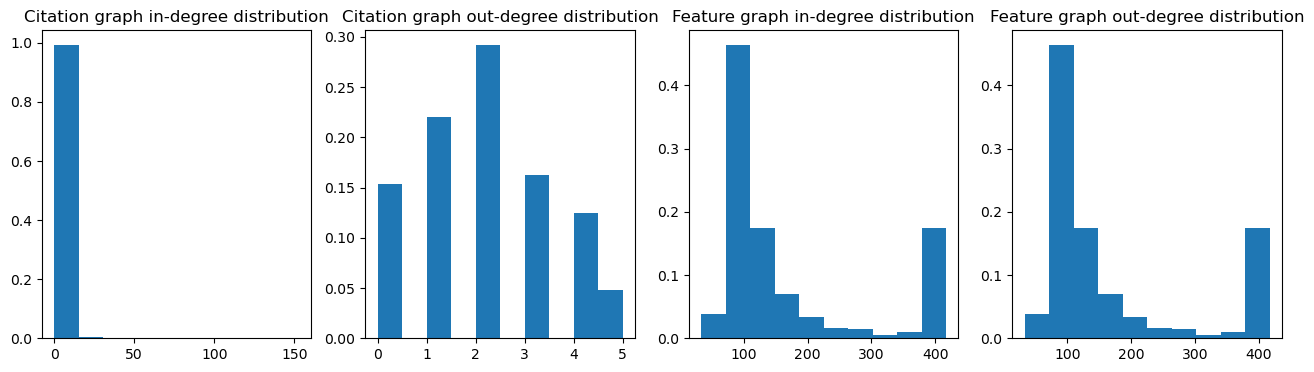

In [14]:
# Your solution here ###########################################################

# In degrees
degrees_citation_in  = A_citation.sum(axis=0)
degrees_feature_in   = A_feature.sum(axis=0)

# Out degrees
degrees_citation_out = A_citation.sum(axis=1)
degrees_feature_out  = A_feature.sum(axis=1)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

deg_hist_normalization = np.ones(degrees_citation_in.shape[0]) / degrees_citation_in.shape[0]
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].set_title('Citation graph in-degree distribution')
axes[0].hist(degrees_citation_in, weights=deg_hist_normalization);
axes[1].set_title('Citation graph out-degree distribution')
axes[1].hist(degrees_citation_out, weights=deg_hist_normalization);
axes[2].set_title('Feature graph in-degree distribution')
axes[2].hist(degrees_feature_in, weights=deg_hist_normalization);
axes[3].set_title('Feature graph out-degree distribution')
axes[3].hist(degrees_feature_out, weights=deg_hist_normalization);

**2.3 [2pt]** From here onwards, we will consider only undirected graphs. If any of the graph is directed, make it undirected. Then compute the degree distribution and compare with the above ones.

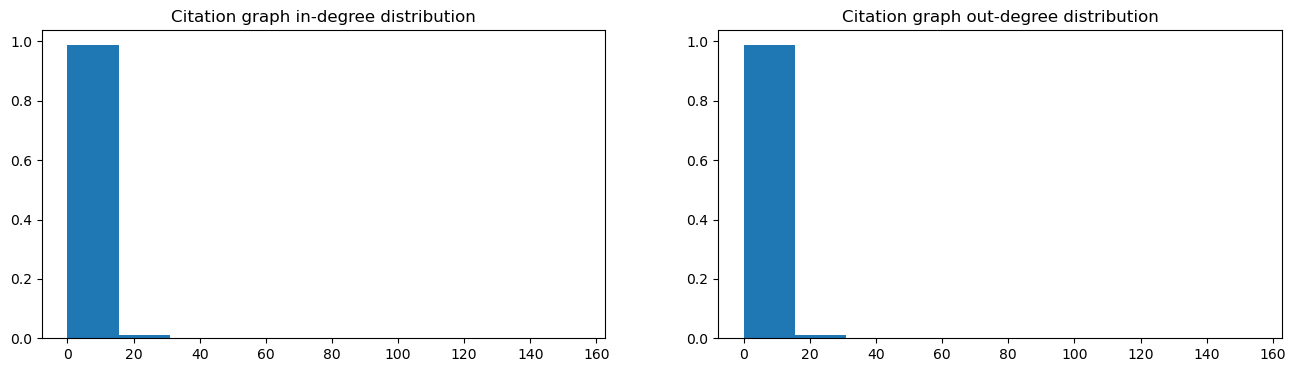

In [15]:
# Your solution here ###########################################################

# Some papers cite each other so threshold is applied to keep link with value 1
A_citation = ((A_citation + A_citation.T) > 0).astype(int)

degrees_citation_in  = A_citation.sum(axis=0)
degrees_citation_out = A_citation.sum(axis=1)

# plot results
deg_hist_normalization = np.ones(degrees_citation_in.shape[0]) / degrees_citation_in.shape[0]
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title('Citation graph in-degree distribution')
axes[0].hist(degrees_citation_in, weights=deg_hist_normalization);
axes[1].set_title('Citation graph out-degree distribution')
axes[1].hist(degrees_citation_out, weights=deg_hist_normalization);

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**2.4 [2pt]** Calculate the first and second moments of the degree distribution of each graph.

In [16]:
# Your solution here ###########################################################

cit_moment_1 = np.mean(degrees_citation_in)
cit_moment_2 = np.mean(degrees_citation_in**2)
feat_moment_1 = np.mean(degrees_feature_in)
feat_moment_2 = np.mean(degrees_feature_in**2)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print(f"1st moment of citation graph: {cit_moment_1}")
print(f"2nd moment of citation graph: {cit_moment_2}")
print(f"1st moment of feature graph: {feat_moment_1}")
print(f"2nd moment of feature graph: {feat_moment_2}")

1st moment of citation graph: 3.9569377990430623
2nd moment of citation graph: 78.53588516746412
1st moment of feature graph: 169.0909090909091
2nd moment of feature graph: 43523.6985645933


**2.5 [3pt]** Explain what information the moments provide about the graphs.
Discuss about the differences in moments between graphs by comparing their degree distributions.

**Your answer here:**  
The first moment $\mathbb{E}[k]$ corresponds to the average degree of the nodes.
<br> The second moment $\mathbb{E}[k^2]$ is related to the variance: $\sigma^2 = \mathbb{E}[k^2] - \mathbb{E}[k]^2$
<br> As is the case here, $\mathbb{E}[k] << \mathbb{E}[k^2]$ hints at a scale-free nature of the graph hence the presence of hubs due to the fact the variance of the degree distribution can be considered unbounded when compared to the average degree. This means that arbitrary nodes of the graph can have widely different degrees.
<br> The degree distributions of each graph shows the first moment which lies around the maximum value. It also shows the presence of hubs (high degree nodes far from the first moment), indicated by a large second moment.

**2.6 [2pt]** Select the 20 largest hubs for each of the graphs and remove them. Observe the sparsity pattern of the adjacency matrices of the citation and feature graphs before and after such a reduction.

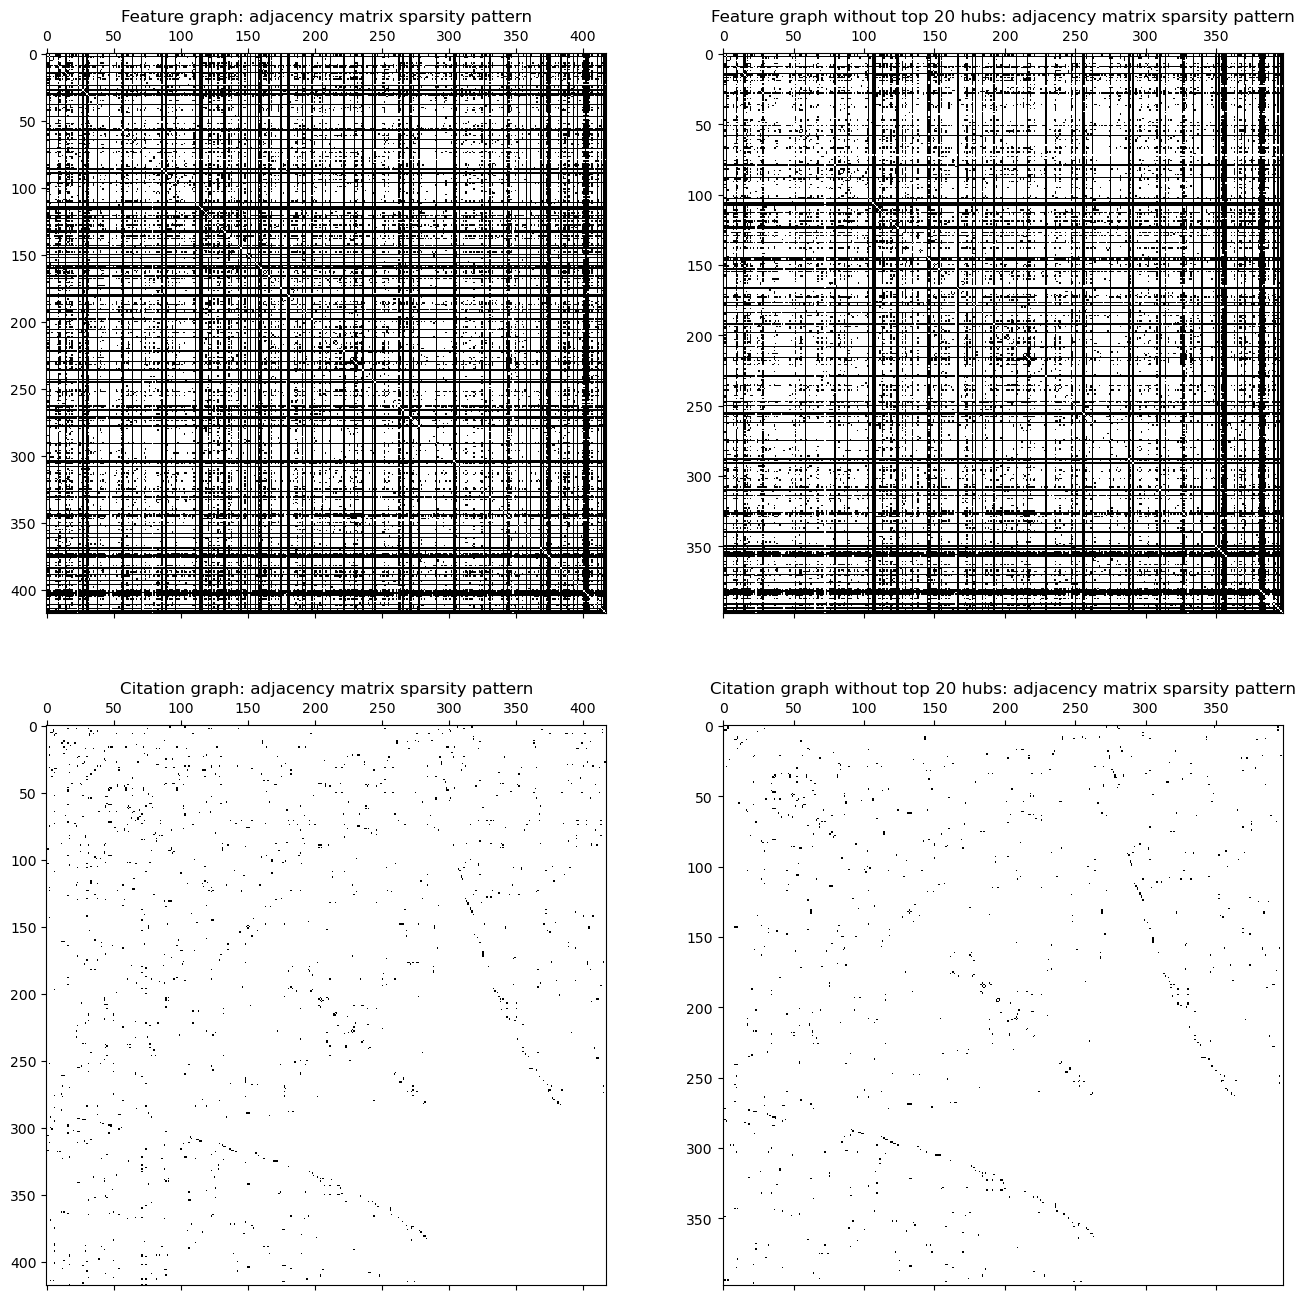

In [17]:
# Your solution here ###########################################################
# get degrees of the new unordered one

feature_no_hubs_ind = np.sort(np.argpartition(degrees_feature_in,-20)[:-20])
reduced_A_feature = A_feature[:,feature_no_hubs_ind][feature_no_hubs_ind,:]


citation_no_hubs_ind = np.sort(np.argpartition(degrees_citation_in,-20)[:-20])
reduced_A_citation = A_citation[:, citation_no_hubs_ind][citation_no_hubs_ind,:]


#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes[0, 0].set_title('Feature graph: adjacency matrix sparsity pattern')
axes[0, 0].spy(A_feature);
axes[0, 1].set_title('Feature graph without top 20 hubs: adjacency matrix sparsity pattern')
axes[0, 1].spy(reduced_A_feature);
axes[1, 0].set_title('Citation graph: adjacency matrix sparsity pattern')
axes[1, 0].spy(A_citation);
axes[1, 1].set_title('Citation graph without top 20 hubs: adjacency matrix sparsity pattern')
axes[1, 1].spy(reduced_A_citation);


**2.7 [1pt]** Plot the new degree distribution histograms.

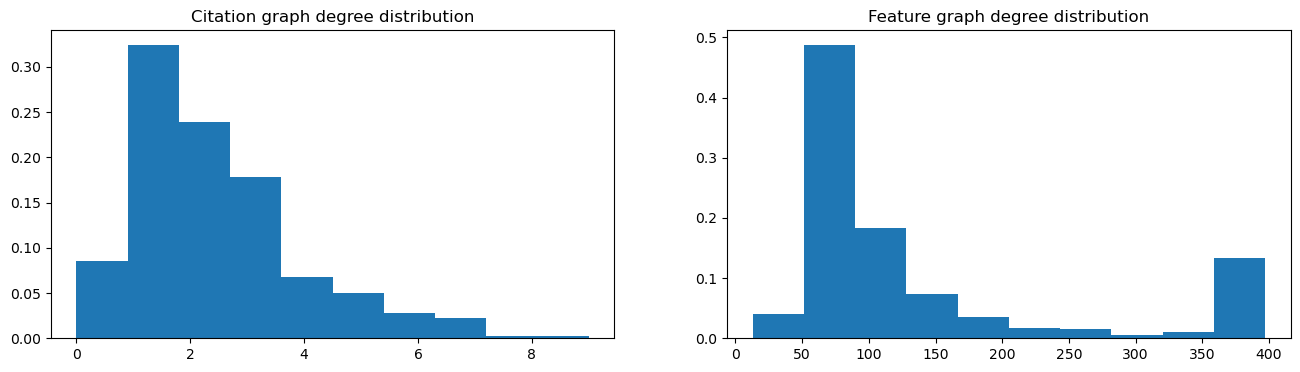

In [18]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# degrees
reduced_degrees_cit  = reduced_A_citation.sum(axis=0)
reduced_degrees_feat = reduced_A_feature.sum(axis=0)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
deg_hist_normalization = np.ones(reduced_degrees_feat.shape[0]) / reduced_degrees_feat.shape[0]

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title('Citation graph degree distribution')
axes[0].hist(reduced_degrees_cit, weights=deg_hist_normalization);
axes[1].set_title('Feature graph degree distribution')
axes[1].hist(reduced_degrees_feat, weights=deg_hist_normalization);

**2.8 [1pt]** Compute the first and second moments for the new graphs.

In [19]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

reduced_cit_moment_1  = np.mean(reduced_degrees_cit)
reduced_cit_moment_2  = np.mean(reduced_degrees_cit**2)
reduced_feat_moment_1 = np.mean(reduced_degrees_feat)
reduced_feat_moment_2 = np.mean(reduced_degrees_feat**2)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("Citation graph first moment:", reduced_cit_moment_1)
print("Citation graph second moment:", reduced_cit_moment_2)
print("Feature graph first moment: ", reduced_feat_moment_1)
print("Feature graph second moment: ", reduced_feat_moment_2)

Citation graph first moment: 2.2261306532663316
Citation graph second moment: 7.693467336683417
Feature graph first moment:  136.63316582914572
Feature graph second moment:  31107.35175879397


**2.9 [2pt]** Print the number of edges in the reduced graphs.

In [20]:
# Your solution here ###########################################################

print("Reduced feature graph edges:", np.sum(reduced_A_feature).astype(int)//2)
print("Reduced citation graph edges:", np.sum(reduced_A_citation).astype(int)//2)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Reduced feature graph edges: 27190
Reduced citation graph edges: 443


**2.10 [2pt]** Describe the effect of removing the hubs in both networks and compare them. Look at the percentage changes for each moment and explain which of the moments is affected the most and in which graph. Discuss about the meaning of this change.

**Hint:** Examine the degree distributions.

**Your answer here:**  
If we first look at the adjacency matrices : removing the hubs lead to sparser matrices, which is especially visible in the feature graph, which makes sense since it has more hubs as seen in its degree distribution and 2nd moment.  
These changes are also visible in the degree  distributions of the new graph; for the citation graph, the really high degree node(s) disappear and we are left with fewer high degree nodes in the histogram. For the featur graph, the number of hubs around $k = 370$ is strongly reduced but 

### Question 3 [8pt]: Pruning, sparsity, paths

**3.1 [1pt]** By adjusting the threshold of the euclidean distance matrix, prune the feature graph so that its number of edges is roughly close (within a hundred edges) to the number of edges in the citation graph.

In [23]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

dist_threshold   = 3
A_feature_pruned = (D<dist_threshold).astype(int)
np.fill_diagonal(A_feature_pruned,0)

num_edges_feature_pruned = np.sum(A_feature_pruned)//2

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print(f"Number of edges in the feature graph: {num_edges_feature}")
print(f"Number of edges in the feature graph after pruning: {num_edges_feature_pruned}")
print(f"Number of edges in the citation graph: {num_edges_citation}")

Number of edges in the feature graph: 35340
Number of edges in the feature graph after pruning: 881
Number of edges in the citation graph: 848


Check your results by comparing the sparsity patterns and total number of edges between the graphs.

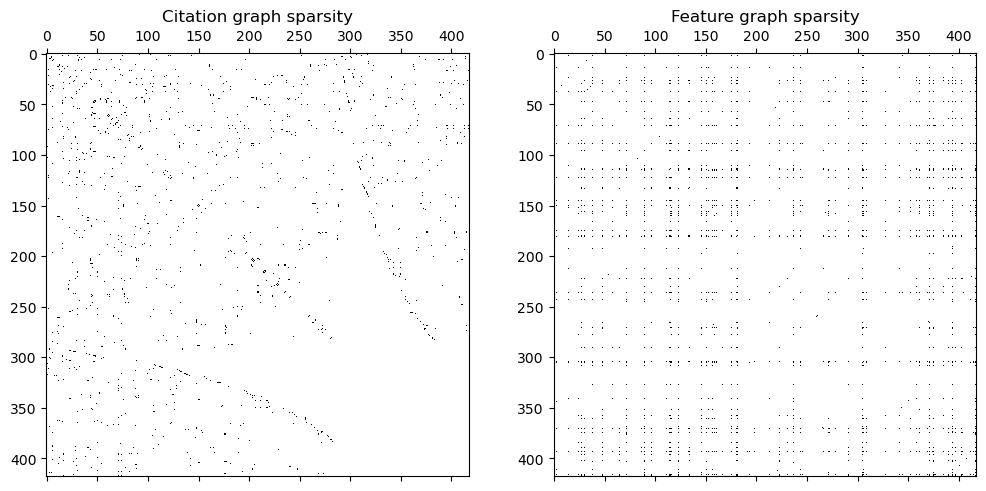

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].set_title('Citation graph sparsity')
axes[0].spy(A_citation);
axes[1].set_title('Feature graph sparsity')
axes[1].spy(A_feature_pruned);

Let $C_{k}(i,j)$ denote the number of paths of length $k$ from node $i$ to node $j$. 

We define the path matrix $P$, with entries
$ P_{ij} = \displaystyle\sum_{k=0}^{N}C_{k}(i,j). $

**3.2 [1pt]** Calculate the path matrices for both the citation and the unpruned feature graphs for $N =10$.  

*Hint:* Use [powers of the adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix#Matrix_powers).

In [25]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

def path_matrix(adj, N):
   P = adj.copy()
   current_power = adj.copy()

   for i in range(2, N+1):
       current_power = np.matmul(current_power, adj)
       P += current_power
   
   return P

N=10
path_matrix_citation = path_matrix(A_citation, N)
path_matrix_feature = path_matrix(A_feature, N)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Check the sparsity pattern for both of path matrices.

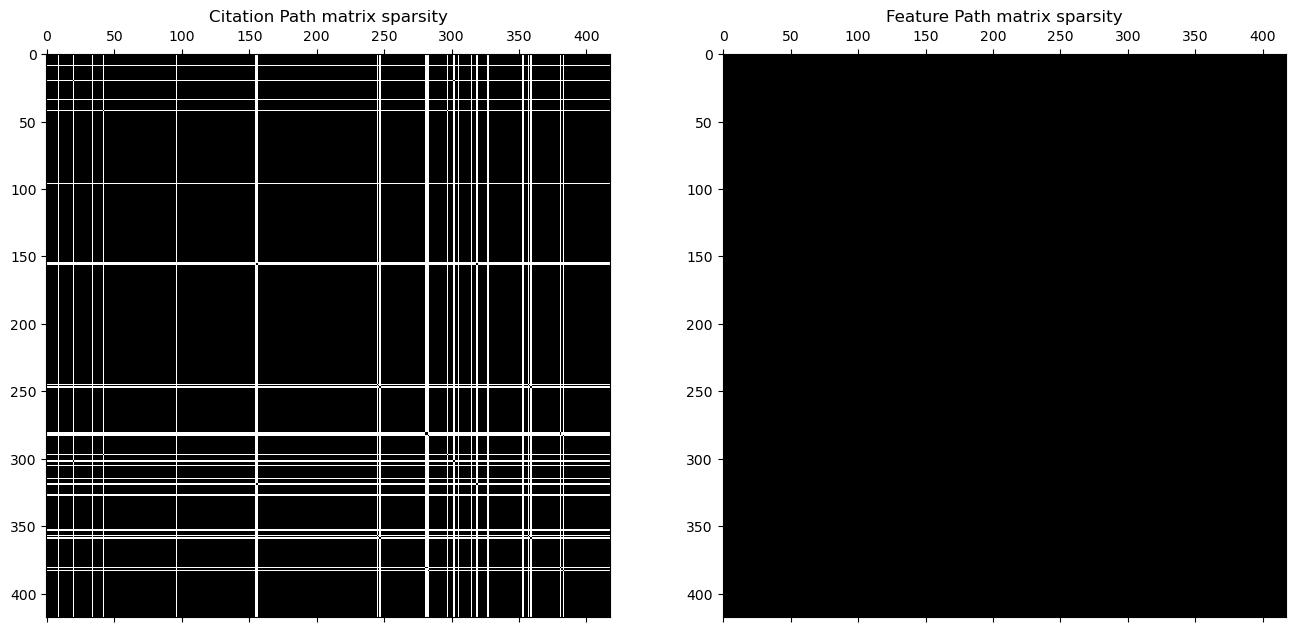

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].set_title('Citation Path matrix sparsity')
axes[0].spy(path_matrix_citation);
axes[1].set_title('Feature Path matrix sparsity')
axes[1].spy(path_matrix_feature);

**3.3 [2pt]** Now calculate the path matrix of the pruned feature graph for $N=10$. Plot the corresponding sparsity pattern.
Describe the differences and motivate.

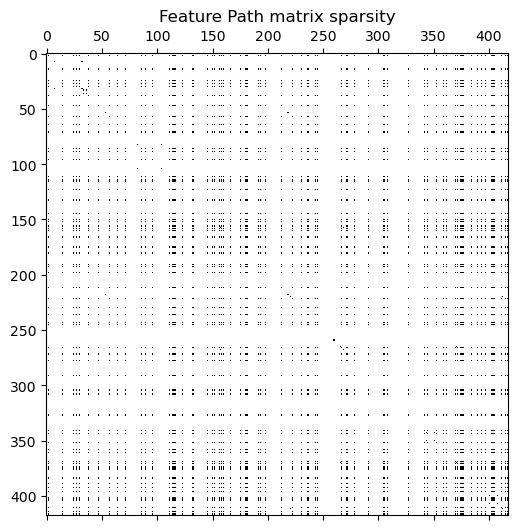

In [27]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

path_matrix_pruned = path_matrix(A_feature_pruned,N)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
plt.figure(figsize=(12, 6))
plt.title('Feature Path matrix sparsity')
plt.spy(path_matrix_pruned);


**Your answer here:**  
The Path matrix for the pruned feature graph is sparse, compared to the one of the original feature graph. Removing edges of the graph by increasing the distance threshold leads to isolated subgraphs that seem to be disconnected since there are separated by paths lonfer than 10 hops. For the original feature graph, it appears from the path matrix that there exists a path of length smaller or equal to 10 between any pair of nodes.

**3.4 [2pt]** Describe how you can use the above process of counting paths to determine whether a graph is connected or not. State whether the original (unpruned) feature graph is connected.

**Your answer here:**  
Looking at the Path matrix for high N can indicate if the graph is connected or not. Indeed when the path matrix becomes full (no zeroes left), it means that paths exist between any pair of nodes. This is the case for the original feature graph.

**3.5 [1pt]** Supposing the graph is connected, describe how to measure its diameter using the path matrix.

**Your answer here:**  
The diameter of a graph is the longest shortest path length. Since the entries of the path matrix give the number of paths of length N or smaller, the longest shorthest path length (diameter) is reached when there are no more 0s in the path matrix. The first N for which the path matrix has no more 0s is the diameter.

**3.6 [1pt]** If any of your graphs is connected, calculate the diameter using that process.

In [28]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
def compute_diameter_path_mat(adj):
    d=1
    P = path_matrix(adj,d)
    while np.count_nonzero(P) < np.prod(P.shape):
        d+=1
        P = path_matrix(adj,d)
    return d
diameter = compute_diameter_path_mat(A_feature)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print(f"The diameter is: {diameter}")

The diameter is: 2


### Question 4 [8pt]: Shortest path

Here, we calculate the shortest path from a source node to a target node. A classic method for finding the shortest path on unweighted networks is Breadth-First Search (BFS) method. Check the BFS steps in the Lecture 'Graph Theory Basis'.

To this end, we first define a function for finding the neighboring nodes of a specified node x. 

In [29]:
### Get the neighboring set of node x
def find_neighbors(x):
    return [i for i in range(A_feature.shape[0]) if A_feature[x][i]>0]

**4.1 [2pt]** Calculate the path length from the source node to the target node by filling the missing code in the algorithm: 

In [30]:
### Find the shortest path from the source node to the target node:
source_node, target_node, path_length = 0, 10, 0
source_set = [source_node]
path = []
stop_finding = 0
iteration_number = A_feature.shape[0]
i = 0
if source_node==target_node:
    stop_finding = 1
    path.append([source_node,target_node,path_length])
while stop_finding == 0 and i < iteration_number:
    source_set_new = []
    for n in source_set:
        neighbors = find_neighbors(n)
        if target_node in neighbors:
            ### Your solution here #############################################
            
            path.append([n, target_node, path_length])

            #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            stop_finding = 1
            break
        else:
            for nn in neighbors:
                ### Your solution here #########################################
                
                path.append([n, nn, path_length])

                #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            source_set_new += neighbors
    path_length += 1
    source_set = source_set_new.copy()
    i += 1
if stop_finding == 0:
    path_length = ['Infinity']
    shortest_path = ['None']
else:
    child_node = target_node
    shortest_path = [target_node]
    for i in range(path_length-1,-1,-1):
        parent_node = [x for [x, y, z] in path if y==child_node and z==i]
        shortest_path.append(parent_node[0])
        child_node = parent_node[0] #Select one of the parent nodes as the child node in previous round
    shortest_path.reverse()

print(f"The shortest path length from node {source_node} to node {target_node} is: {path_length}")
print(f"One shortest path is: {shortest_path}")

The shortest path length from node 0 to node 10 is: 2
One shortest path is: [0, 2, 10]


**4.2 [2pt]** Get all edges visited by BFS starting from a source node by filling the missing lines in the following code: 

In [31]:
# All edges visited by BFS method starting from a source node
BFS_edges = []
unexplored_list = list(range(A_feature.shape[0]))
source_node = 0
source_set = [source_node]
unexplored_list.remove(source_node) 
stop_finding = 0
while stop_finding == 0:
    source_set_new = []
    for n in source_set:
        neighbors = find_neighbors(n)
        for nn in neighbors:
            if nn in unexplored_list:
                ### Your solution here #########################################
                
                BFS_edges.append((n, nn))
                unexplored_list.remove(nn)

                #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

                source_set_new.append(nn)
    if not source_set_new:
        stop_finding = 1      
    else:
        source_set = source_set_new.copy()
print(f"Edges visited by Breadth-First Search method starting from node {source_node}:")
list(BFS_edges)[:5]

Edges visited by Breadth-First Search method starting from node 0:


[(0, 2), (0, 7), (0, 9), (0, 14), (0, 15)]

**4.3 [2pt]** Explain the difference between BFS algorithm and the Dijkstra's algorithm.

**Your answer here:**  
Both algorithms compute shortest path length but BFS works for unweighted graphs while Dijkstra is for weighted graphs. The output of BFS is a hop distance, for Dijkstra it is the sum of weighted edges between two nodes.

**4.4 [2pt]** Check if your guess was correct using [NetworkX](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.diameter.html).

*Note:* usage of NetworkX is only allowed in this part of Section 1.

Compute the diameter using NetworkX.

In [32]:
import networkx as nx
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

G    = nx.from_numpy_array(A_feature)
diam = nx.diameter(G)

print(f"Diameter according to networkx: {diam}")
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Diameter according to networkx: 2


Let us now check our results of BFS method using NetworkX:
<br>
(1) As before, print the first 5 BFS visited edges
<br>
(2) As before, calculate and print the shortest path length from node 0 to node 10 

In [33]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print("Edges visited by Breadth-First Search method starting from node 0 and \
using NetworkX:")

nx_BFS_edges = nx.bfs_edges(G, 0)

for i,e in enumerate(nx_BFS_edges):
  if i > 4:
    break
  print(e)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Edges visited by Breadth-First Search method starting from node 0 and using NetworkX:
(0, 2)
(0, 7)
(0, 9)
(0, 14)
(0, 15)


In [34]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

sht_path = nx.shortest_path(G, source_node, target_node)

print(f"The shortest path length from node {source_node} to node {target_node} is: {len(sht_path)-1}")
print(f"One shortest path is: {sht_path}")

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

The shortest path length from node 0 to node 10 is: 2
One shortest path is: [0, 2, 10]
